<a href="https://colab.research.google.com/github/saghar-trade/deep-learning/blob/main/CLUSTERING_silhouette_adjustedrand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import silhouette_score , adjusted_rand_score
from sklearn.cluster import KMeans, DBSCAN
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import datasets



In [53]:
iris=load_iris()
x=pd.DataFrame(iris.data, columns=iris.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [37]:
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=42)

In [38]:
dbscan=DBSCAN()
dbscan.fit(x_scaled)


DBSCAN()

In [39]:
silhouette_avg=silhouette_score(x_scaled,kmeans.labels_)
print(' the average silhouette_score is : ',silhouette_avg)

 the average silhouette_score is :  0.4798814508199817


In [40]:
y=iris.target

In [41]:
kmeans.labels_

array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [42]:
silhouette_avg=silhouette_score(x_scaled,dbscan.labels_)
print(' the average silhouette_score is : ',silhouette_avg)

 the average silhouette_score is :  0.35651648142700726


In [43]:
#define the number of clusters to try
k_values=range(2,8)
#create a list to store the silhouette score
silhouette_scores=[]


In [44]:
for k in k_values:
  #fit the kmeans model to the data
  model=KMeans(n_clusters=k)
  model.fit(x_scaled[:,0:2])

  #get the predicted label for each point
  labels=model.predict(x_scaled[:,0:2])

  score=silhouette_score(x_scaled[:,0:2], labels)
  silhouette_scores.append(score)


Text(0.5, 1.0, '  silhouette_score vs Number of Clusters')

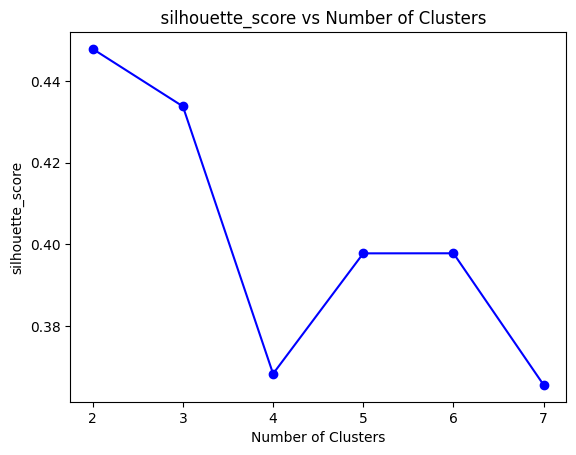

In [45]:
plt.plot(k_values,silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('silhouette_score')
plt.title('  silhouette_score vs Number of Clusters')

In [50]:
best_k=k_values[np.argmax(silhouette_scores)]
best_model=KMeans(n_clusters=best_k)

KMeans(n_clusters=2)

In [52]:
best_model.fit(x_scaled)
best_labels=best_model.predict(x_scaled)

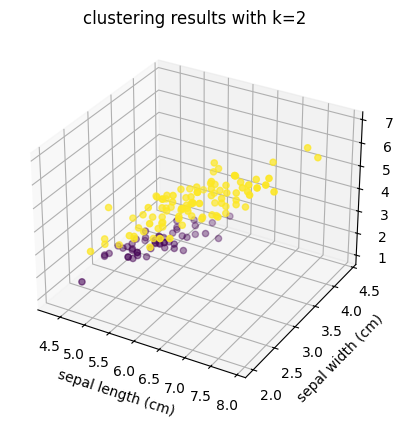

In [54]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x['sepal length (cm)'],x['sepal width (cm)'],x['petal length (cm)'],c=best_labels)
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')
ax.set_zlabel('petal length (cm)')
plt.title('clustering results with k={}'.format(best_k))
plt.show()
